## Neural Networks algorithm
### Dataset 2

In [1]:
import nbimporter

from Helper import * 
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

random_seed = 42

Importing Jupyter notebook from Helper.ipynb


In [2]:
X_train, X_test, y_train, y_test = import_dataset2()

number of training samples:  2520
number of test samples:  630


In [3]:
X_train = scaler.fit_transform(X_train,)
X_test = scaler.transform(X_test)

In [4]:
estimator = MLPClassifier(hidden_layer_sizes=(
    100, ), early_stopping=False,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator2 = MLPClassifier(hidden_layer_sizes=(
    100, 32), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator3 = MLPClassifier(hidden_layer_sizes=(
    128, 32), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator4 = MLPClassifier(hidden_layer_sizes=(
    128, 32, 16), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator5 = MLPClassifier(hidden_layer_sizes=(
    256, 128, 32, 16), early_stopping=True,activation='relu', learning_rate_init=0.001, solver='adam', max_iter=50)

estimator.fit(X_train, y_train)
estimator2.fit(X_train, y_train)
estimator3.fit(X_train, y_train)
estimator4.fit(X_train, y_train)
estimator5.fit(X_train, y_train)

/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, hidden_layer_sizes=(256, 128, 32, 16),
              max_iter=50)

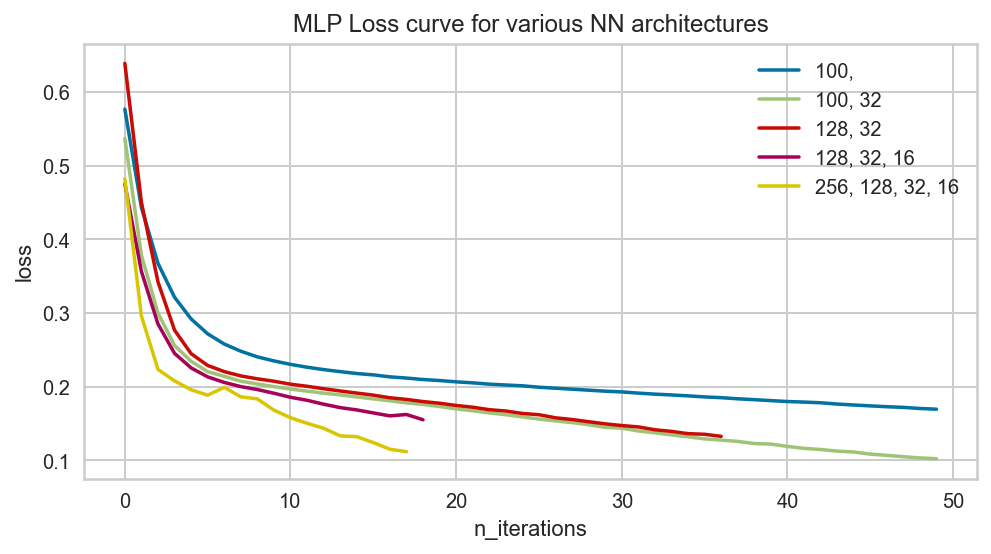

In [5]:
plt.figure(figsize=(8,4));

plt.plot(estimator.loss_curve_, label='100, ',)
plt.plot(estimator2.loss_curve_, label='100, 32')
plt.plot(estimator3.loss_curve_, label='128, 32')
plt.plot(estimator4.loss_curve_, label='128, 32, 16')
plt.plot(estimator5.loss_curve_, label='256, 128, 32, 16')
plt.xlabel('n_iterations')
plt.ylabel('loss')
plt.title('MLP Loss curve for various NN architectures')

plt.legend();

In [6]:
clf = MLPClassifier(
    alpha=0.0001, 
    batch_size='auto',
    learning_rate='constant',
    power_t=0.5, 
    shuffle=True, 
    random_state=random_seed, 
    tol=0.0001,
    verbose=False,
    warm_start=False, 
    momentum=0.9, 
    nesterovs_momentum=True, 
    early_stopping=True, 
    validation_fraction=0.1, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-08, 
    n_iter_no_change=10, 
    max_fun=15000)

check_params = dict(activation= ['logistic', 'tanh', 'relu'],
                    solver= ['adam', 'sgd'],
                    learning_rate_init= [0.001, 0.005, 0.010, 0.05, 0.1],
                    hidden_layer_sizes =[(256, 128, 32, 16,), (256, 128, 32, 8), (256, 128, 16, 2)],
                    max_iter= [50, 100, 150, 200])

In [7]:
create_grid = GridSearchCV(clf, param_grid=check_params, cv=StratifiedKFold(5), n_jobs=-1, scoring='roc_auc')
create_grid.fit(X_train, y_train)
print("score :",  create_grid.score(X_test, y_test))
print("Best fit parameters from GridSearchCV: ")
print(create_grid.best_params_)
print('')

score : 0.9798550476516578
Best fit parameters from GridSearchCV: 
{'activation': 'relu', 'hidden_layer_sizes': (256, 128, 32, 16), 'learning_rate_init': 0.01, 'max_iter': 50, 'solver': 'adam'}



In [8]:
estimator.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Look at alpha in case of overfitting 

In [9]:
#lr_range=list(np.arange(0.005, 0.015, 0.001))
#lr_range = [round(i,5) for i in lr_range]
#lr_range

/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converge

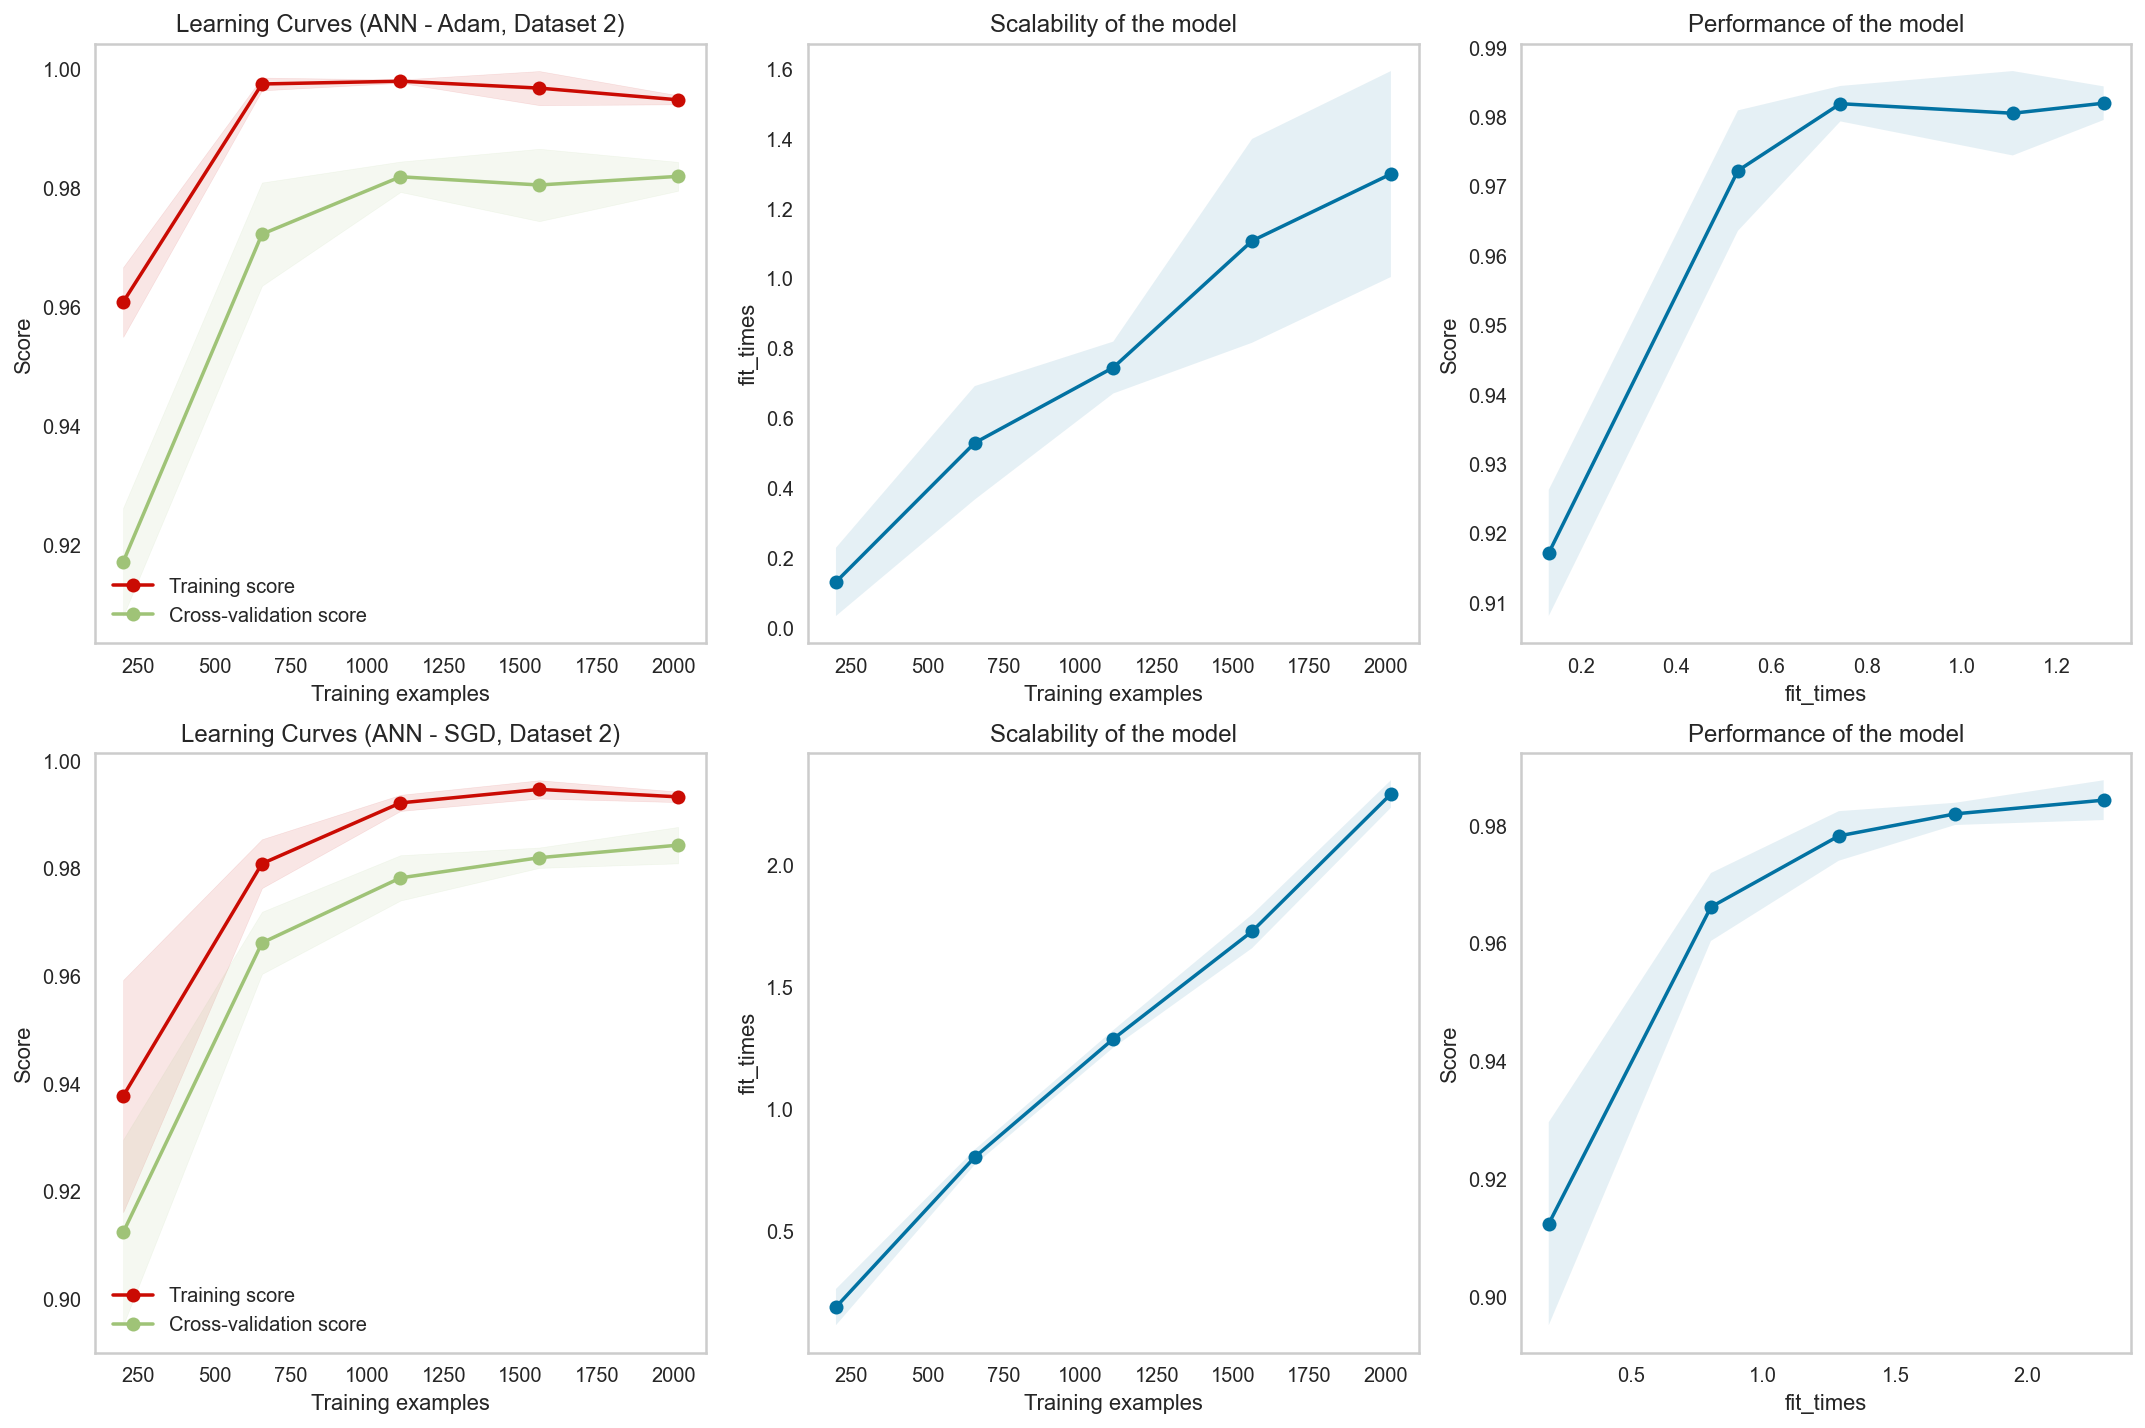

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

title = "Learning Curves (ANN - Adam, Dataset 2)"

estimator = MLPClassifier(hidden_layer_sizes=(
    256, 128, 32, 16), activation='relu', learning_rate_init=0.01, solver='adam', max_iter=100)
plot_learning_curve(estimator, title, X_train, y_train,
                    cv=StratifiedKFold(5), n_jobs=1, axes=axes[0, :])

estimator1 = MLPClassifier(hidden_layer_sizes=(
    256, 128, 32, 16), activation='relu', learning_rate_init=0.01, solver='sgd', max_iter=100)
title = "Learning Curves (ANN - SGD, Dataset 2)"

plot_learning_curve(estimator1, title, X_train, y_train,
                    cv=StratifiedKFold(5), n_jobs=1, axes=axes[1, :])

plt.tight_layout()
plt.show()

In [22]:
parameter_range = np.arange(0.0001, 0.025, 0.001)
parameter_range

array([0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071,
       0.0081, 0.0091, 0.0101, 0.0111, 0.0121, 0.0131, 0.0141, 0.0151,
       0.0161, 0.0171, 0.0181, 0.0191, 0.0201, 0.0211, 0.0221, 0.0231,
       0.0241])

/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/orentevet/.pyenv/versions/3.8.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converge

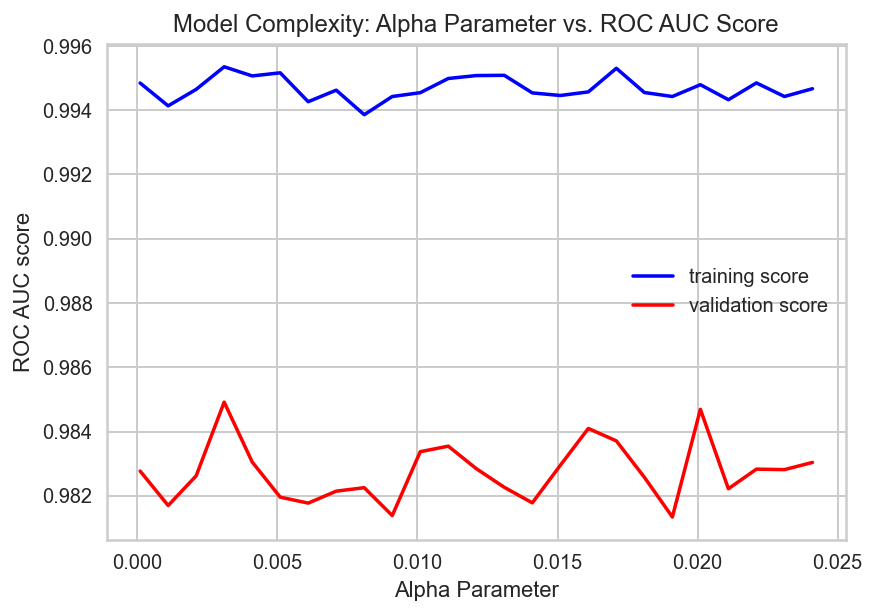

In [23]:
train_score, val_score = validation_curve(MLPClassifier(hidden_layer_sizes=(128, 32, 16),
                                                         activation='relu', 
                                                         learning_rate_init=0.001,
                                                         solver='adam',
                                                         max_iter=100),
                                          X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'alpha', 
                                          param_range = parameter_range,
                                          cv=StratifiedKFold(5))

plt.plot(parameter_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(parameter_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity: Alpha Parameter vs. ROC AUC Score')
#plt.ylim(0, 1)
plt.xlabel('Alpha Parameter')
plt.ylabel('ROC AUC score');

In [13]:
estimator_final = MLPClassifier(hidden_layer_sizes=(
    128, 32, 16), early_stopping=True,activation='relu', alpha=0.02, solver='adam', max_iter=100, learning_rate_init=0.001)

In [26]:
%%time
estimator_final.fit(X_train, y_train)

CPU times: user 4.1 s, sys: 645 ms, total: 4.75 s
Wall time: 613 ms


MLPClassifier(alpha=0.02, early_stopping=True, hidden_layer_sizes=(128, 32, 16),
              max_iter=100)

In [25]:
%%timeit
y_pred = estimator_final.predict(X_test)

762 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


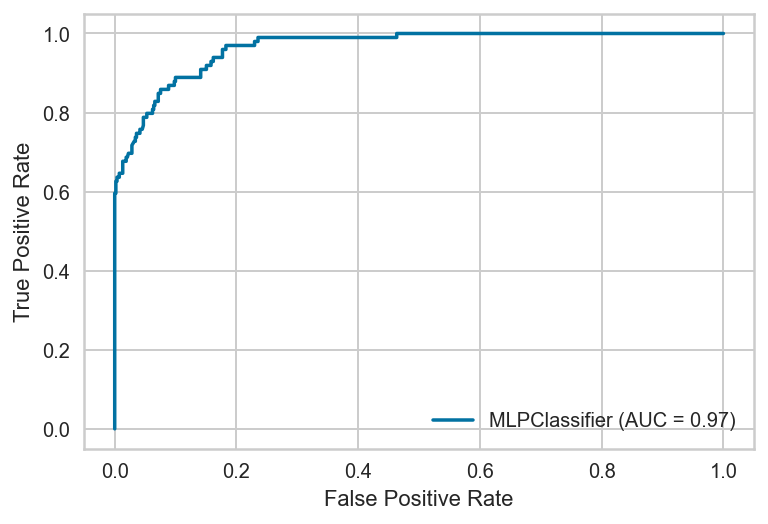

In [19]:
plot_roc_curve(estimator_final, X_test, y_test);

In [20]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)

,precision,recall,f1-score,support
0,0.945255,0.975518,0.960148,531.000000
1,0.841463,0.696970,0.762431,99.000000
accuracy,0.931746,0.931746,0.931746,0.931746
macro avg,0.893359,0.836244,0.861290,630.000000
weighted avg,0.928945,0.931746,0.929078,630.000000
